# This notebook explores the SKA1 SDP Design Equations

## Source: PDR05 v1.85

In [3]:
""" These first few lines below import the IPython definitions and methods that we will use, including the ability to
display"""
from sympy import init_session
init_session(
    use_latex=True,
    use_unicode=True,
    pretty_print=True,
    quiet=True,
)
from parameter_definitions import ParameterContainer
from design_equations import DesignEquations as de

o = ParameterContainer()
de.define_symbolic_variables(o)

from api_ipython import SkaIPythonAPI as iapi
from parameter_definitions import *
from parameter_definitions import Constants as c

IPython console for SymPy 0.7.6 (Python 2.7.7-32-bit) (ground types: python)


### 1.	The peak FLOP capability of the units taken together has to exceed the total FLOPS required for spectral line and continuum processing combined 

In [4]:
o.Ncu * o.RcuFLOP > o.RspecFLOP + o.RcontFLOP + o.RfastFLOP

In [5]:
#Or numerically
result1_low = iapi.eval_expression_default(Telescopes.SKA1_Low, ImagingModes.All, Bands.Low, bldta=True, on_the_fly=False
                                          , expression='Rflop')
result1_mid = iapi.eval_expression_default(Telescopes.SKA1_Mid, ImagingModes.All, Bands.Mid1, bldta=True, on_the_fly=False
                                          , expression='Rflop')
result1_sur = iapi.eval_expression_default(Telescopes.SKA1_Sur_old, ImagingModes.All, Bands.Sur1, bldta=False, on_the_fly=False
                                          , expression='Rflop')
print '\nDesign Equation 1 evaluates to:\n'
print '%s > %.2f PetaFLOPS \tfor SKA1 LOW' % (str(o.Ncu * o.RcuFLOP), result_low / c.peta)
print '%s > %.2f PetaFLOPS \tfor SKA1 MID (Band 1)' % (str(o.Ncu * o.RcuFLOP), result_mid / c.peta)
print '\n%s > %.2f PetaFLOPS \tfor SKA1 SURVEY (Band 1) (pre-rebaselining)' % (str(o.Ncu * o.RcuFLOP), result_sur / c.peta)


Design Equation 1 evaluates to:

N_cu*R_cu,FLOP > 11.60 PetaFLOPS 	for SKA1 LOW
N_cu*R_cu,FLOP > 111.73 PetaFLOPS 	for SKA1 MID (Band 1)

N_cu*R_cu,FLOP > 177.46 PetaFLOPS 	for SKA1 SURVEY (Band 1) (pre-rebaselining)


### 2.	The total memory bandwidth required has to exceed the required memory bandwidth

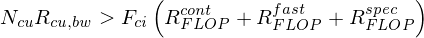

In [3]:
o.Ncu * o.RcuBw > o.Fci*(o.RspecFLOP + o.RcontFLOP + o.RfastFLOP)

In [8]:
#Or numerically
print '\nDesign Equation 2 evaluates to:\n'
Fci = 2
print '%s > %.2f PetaBytes/s \tfor SKA1 LOW' % (str(o.Ncu * o.RcuBw), result1_low*Fci / c.peta)
print '%s > %.2f PetaBytes/s \tfor SKA1 MID (Band 1)' % (str(o.Ncu * o.RcuBw), result1_mid*Fci / c.peta)
print '\n%s > %.2f PetaBytes/s \tfor SKA1 Survey (Band 1) (pre-rebaselining)' % (str(o.Ncu * o.RcuBw), result1_sur*Fci / c.peta)


Design Equation 2 evaluates to:

N_cu*R_cu,bw > 23.20 PetaBytes/s 	for SKA1 LOW
N_cu*R_cu,bw > 223.46 PetaBytes/s 	for SKA1 MID (Band 1)

N_cu*R_cu,bw > 354.93 PetaBytes/s 	for SKA1 Survey (Band 1) (pre-rebaselining)


### 3.	The visibility buffer of all compute units together must be sufficiently large to hold both the full resolution visibilities and frequency binned visibilities for continuum processing 

In [9]:
o.Ncu * o.McuBuf > o.MspecBufVis + o.McontBufVis

In [3]:
result3_low = iapi.eval_expression_default(Telescopes.SKA1_Low, ImagingModes.ContAndSpectral, Bands.Low, bldta=True
                                           , on_the_fly=False, expression='Mbuf_vis')
result3_mid = iapi.eval_expression_default(Telescopes.SKA1_Mid, ImagingModes.ContAndSpectral, Bands.Mid1, bldta=True
                                           , on_the_fly=False, expression='Mbuf_vis')
#Or numerically
print '\nDesign Equation 3 evaluates to:\n'
Fci = 2
print '%s > %.2f PetaBytes \tfor SKA1 LOW' % (str(o.Ncu * o.McuBuf), result3_low / c.peta)
print '%s > %.2f PetaBytes \tfor SKA1 MID (Band 1)' % (str(o.Ncu * o.McuBuf), result3_mid / c.peta)


Design Equation 3 evaluates to:

M_cu,buf*N_cu > 29.67 PetaBytes 	for SKA1 LOW
M_cu,buf*N_cu > 14.01 PetaBytes 	for SKA1 MID (Band 1)


### 4.	The total bandwidth to the visibility buffer must exceed the greater of the bandwidth required for the continuum or spectral line case. If we assume that processing is limited by available FLOPs then the we can compute the rates as

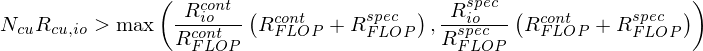

In [2]:
o.Ncu * o.RcuIo > Max(o.RspecIo*(o.RspecFLOP + o.RcontFLOP)/o.RspecFLOP, o.RcontIo*(o.RspecFLOP + o.RcontFLOP)/o.RcontFLOP)

In [11]:
bldta = True
otf = False
Rflop_cont_low = iapi.eval_expression_default(Telescopes.SKA1_Low, ImagingModes.Continuum, Bands.Low, bldta=bldta
                                           , on_the_fly=otf, expression='Rflop')
Rflop_spec_low = iapi.eval_expression_default(Telescopes.SKA1_Low, ImagingModes.Spectral, Bands.Low, bldta=bldta
                                           , on_the_fly=otf, expression='Rflop')
Rio_cont_low = iapi.eval_expression_default(Telescopes.SKA1_Low, ImagingModes.Continuum, Bands.Low, bldta=bldta
                                           , on_the_fly=otf, expression='Rio')
Rio_spec_low = iapi.eval_expression_default(Telescopes.SKA1_Low, ImagingModes.Spectral, Bands.Low, bldta=bldta
                                           , on_the_fly=otf, expression='Rio')

Rflop_cont_mid = iapi.eval_expression_default(Telescopes.SKA1_Mid, ImagingModes.Continuum, Bands.Mid1, bldta=bldta
                                           , on_the_fly=otf, expression='Rflop')
Rflop_spec_mid = iapi.eval_expression_default(Telescopes.SKA1_Mid, ImagingModes.Spectral, Bands.Mid1, bldta=bldta
                                           , on_the_fly=otf, expression='Rflop')
Rio_cont_mid = iapi.eval_expression_default(Telescopes.SKA1_Mid, ImagingModes.Continuum, Bands.Mid1, bldta=bldta
                                           , on_the_fly=otf, expression='Rio')
Rio_spec_mid = iapi.eval_expression_default(Telescopes.SKA1_Mid, ImagingModes.Spectral, Bands.Mid1, bldta=bldta
                                           , on_the_fly=otf, expression='Rio')


result4_low = Max((Rio_cont_low/Rflop_cont_low)*(Rflop_cont_low + Rflop_spec_low), (Rio_spec_low/Rflop_spec_low)*(Rflop_cont_low + Rflop_spec_low))
result4_mid = Max((Rio_cont_mid/Rflop_cont_mid)*(Rflop_cont_mid + Rflop_spec_mid), (Rio_spec_mid/Rflop_spec_mid)*(Rflop_cont_mid + Rflop_spec_mid))

#Or numerically
print '\nDesign Equation 4 evaluates to:\n'
print '%s > %.2f TB/s \tfor SKA1 LOW' % (str(o.Ncu * o.RcuIo), result4_low / c.tera)
print '%s > %.2f TB/s \tfor SKA1 MID (Band 1)' % (str(o.Ncu * o.RcuIo), result4_mid / c.tera)


Design Equation 4 evaluates to:

N_cu*R_cu,io > 7.59 TB/s 	for SKA1 LOW
N_cu*R_cu,io > 66.69 TB/s 	for SKA1 MID (Band 1)


### 5.	If frequency-polarisation-beam parallelism only is to be used with no faceting or other image plane or uv plane division then

In [7]:
# Working memory per compute unit must be greater than the target grid memory
o.McuWork > o.MuvGrid

In [17]:
bldta = True
otf = False
Npix_low = iapi.eval_expression_default(Telescopes.SKA1_Low, ImagingModes.All, Bands.Low, bldta=bldta
                                           , on_the_fly=otf, expression='Npix_linear')
Npix_mid = iapi.eval_expression_default(Telescopes.SKA1_Mid, ImagingModes.All, Bands.Mid1, bldta=bldta
                                           , on_the_fly=otf, expression='Npix_linear')
result4_low = 16 * Npix_low**2 # Eq 9, in bytes
result4_mid = 16 * Npix_mid**2 # Eq 9, in bytes

#Or numerically
print '\nDesign Equation 5a evaluates to:\n'
Fci = 2
print '%s > %.2f GB \tfor SKA1 LOW' % (str(o.McuWork), result4_low / c.giga)
print '%s > %.2f GB \tfor SKA1 MID (Band 1)' % (str(o.McuWork), result4_mid / c.giga)


Design Equation 5a evaluates to:

M_cu,work > 61.60 GB 	for SKA1 LOW
M_cu,work > 162.51 GB 	for SKA1 MID (Band 1)


In [18]:
# Each compute unit must have reasonably fast memory to keep the grids not being immediately worked on (M_(cu,pool )). 
# The experience of ASKAPSoft is that about 10 copies are necessary
o.McuPool > 10 * o.MuvGrid 

In [19]:
#Or numerically
print '\nDesign Equation 5b evaluates to:\n'
Fci = 2
print '%s > %.2f GB \tfor SKA1 LOW' % (str(o.McuPool), 10*result4_low / c.giga)
print '%s > %.2f GB \tfor SKA1 MID (Band 1)' % (str(o.McuPool), 10*result4_mid / c.giga)


Design Equation 5b evaluates to:

M_cu,pool > 615.99 GB 	for SKA1 LOW
M_cu,pool > 1625.09 GB 	for SKA1 MID (Band 1)


In [20]:
# The FFT and Gridding computing steps are limited by available 
o.NfOut * o.RcuFLOP > 2 * o.Nmajor * (o.Rfft + o.Rrp)  

In [16]:
bldta = True
otf = False
Nmajor_low = iapi.eval_expression_default(Telescopes.SKA1_Low, ImagingModes.All, Bands.Low, bldta=bldta
                                           , on_the_fly=otf, expression='Nmajor')
Rfft_low = iapi.eval_expression_default(Telescopes.SKA1_Low, ImagingModes.All, Bands.Low, bldta=bldta
                                           , on_the_fly=otf, expression='Rflop_fft')
Rrp_low = iapi.eval_expression_default(Telescopes.SKA1_Low, ImagingModes.All, Bands.Low, bldta=bldta
                                           , on_the_fly=otf, expression='Rrp')

Nmajor_mid = iapi.eval_expression_default(Telescopes.SKA1_Mid, ImagingModes.All, Bands.Mid1, bldta=bldta
                                           , on_the_fly=otf, expression='Nmajor')
Rfft_mid = iapi.eval_expression_default(Telescopes.SKA1_Mid, ImagingModes.All, Bands.Mid1, bldta=bldta
                                           , on_the_fly=otf, expression='Rflop_fft')
Rrp_mid = iapi.eval_expression_default(Telescopes.SKA1_Mid, ImagingModes.All, Bands.Mid1, bldta=bldta
                                           , on_the_fly=otf, expression='Rrp')

tp = ParameterContainer()
ParameterDefinitions.apply_global_parameters(tp)
ParameterDefinitions.apply_telescope_parameters(tp, Telescopes.SKA1_Low)
ParameterDefinitions.apply_imaging_mode_parameters(tp, ImagingModes.Continuum)
Nf_out_low = tp.Nf_out
ParameterDefinitions.apply_imaging_mode_parameters(tp, ImagingModes.Spectral)
Nf_out_low += tp.Nf_out
ParameterDefinitions.apply_imaging_mode_parameters(tp, ImagingModes.FastImg)
Nf_out_low += tp.Nf_out

tp = ParameterContainer()
ParameterDefinitions.apply_global_parameters(tp)
ParameterDefinitions.apply_telescope_parameters(tp, Telescopes.SKA1_Mid)
ParameterDefinitions.apply_imaging_mode_parameters(tp, ImagingModes.Continuum)
Nf_out_mid = tp.Nf_out
ParameterDefinitions.apply_imaging_mode_parameters(tp, ImagingModes.Spectral)
Nf_out_mid += tp.Nf_out
ParameterDefinitions.apply_imaging_mode_parameters(tp, ImagingModes.FastImg)
Nf_out_mid += tp.Nf_out

result5c_low = 2*Nmajor_low*(Rfft_low + Rrp_low)/Nf_out_low
result5c_mid = 2*Nmajor_mid*(Rfft_mid + Rrp_mid)/Nf_out_mid

#Or numerically
print '\nDesign Equation 5c evaluates to:\n'
print '%s > %.2f TFLOP/s \tfor SKA1 LOW' % (str(o.RcuFLOP), result5c_low / c.tera)
print '%s > %.2f TFLOP/s \tfor SKA1 MID (Band1)' % (str(o.RcuFLOP), result5c_mid / c.tera)


Design Equation 5c evaluates to:

R_cu,FLOP > 2.07 TFLOP/s 	for SKA1 LOW
R_cu,FLOP > 27.99 TFLOP/s 	for SKA1 MID (Band1)


## 15.1	Interconnect Requirements ... to be continued....